In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print(data.head())
print(data.info())
print(data.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [6]:
zero_counts = (data == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [7]:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

data[columns_to_clean] = data[columns_to_clean].replace(0, np.NaN)
data.fillna(data.mean(), inplace=True)


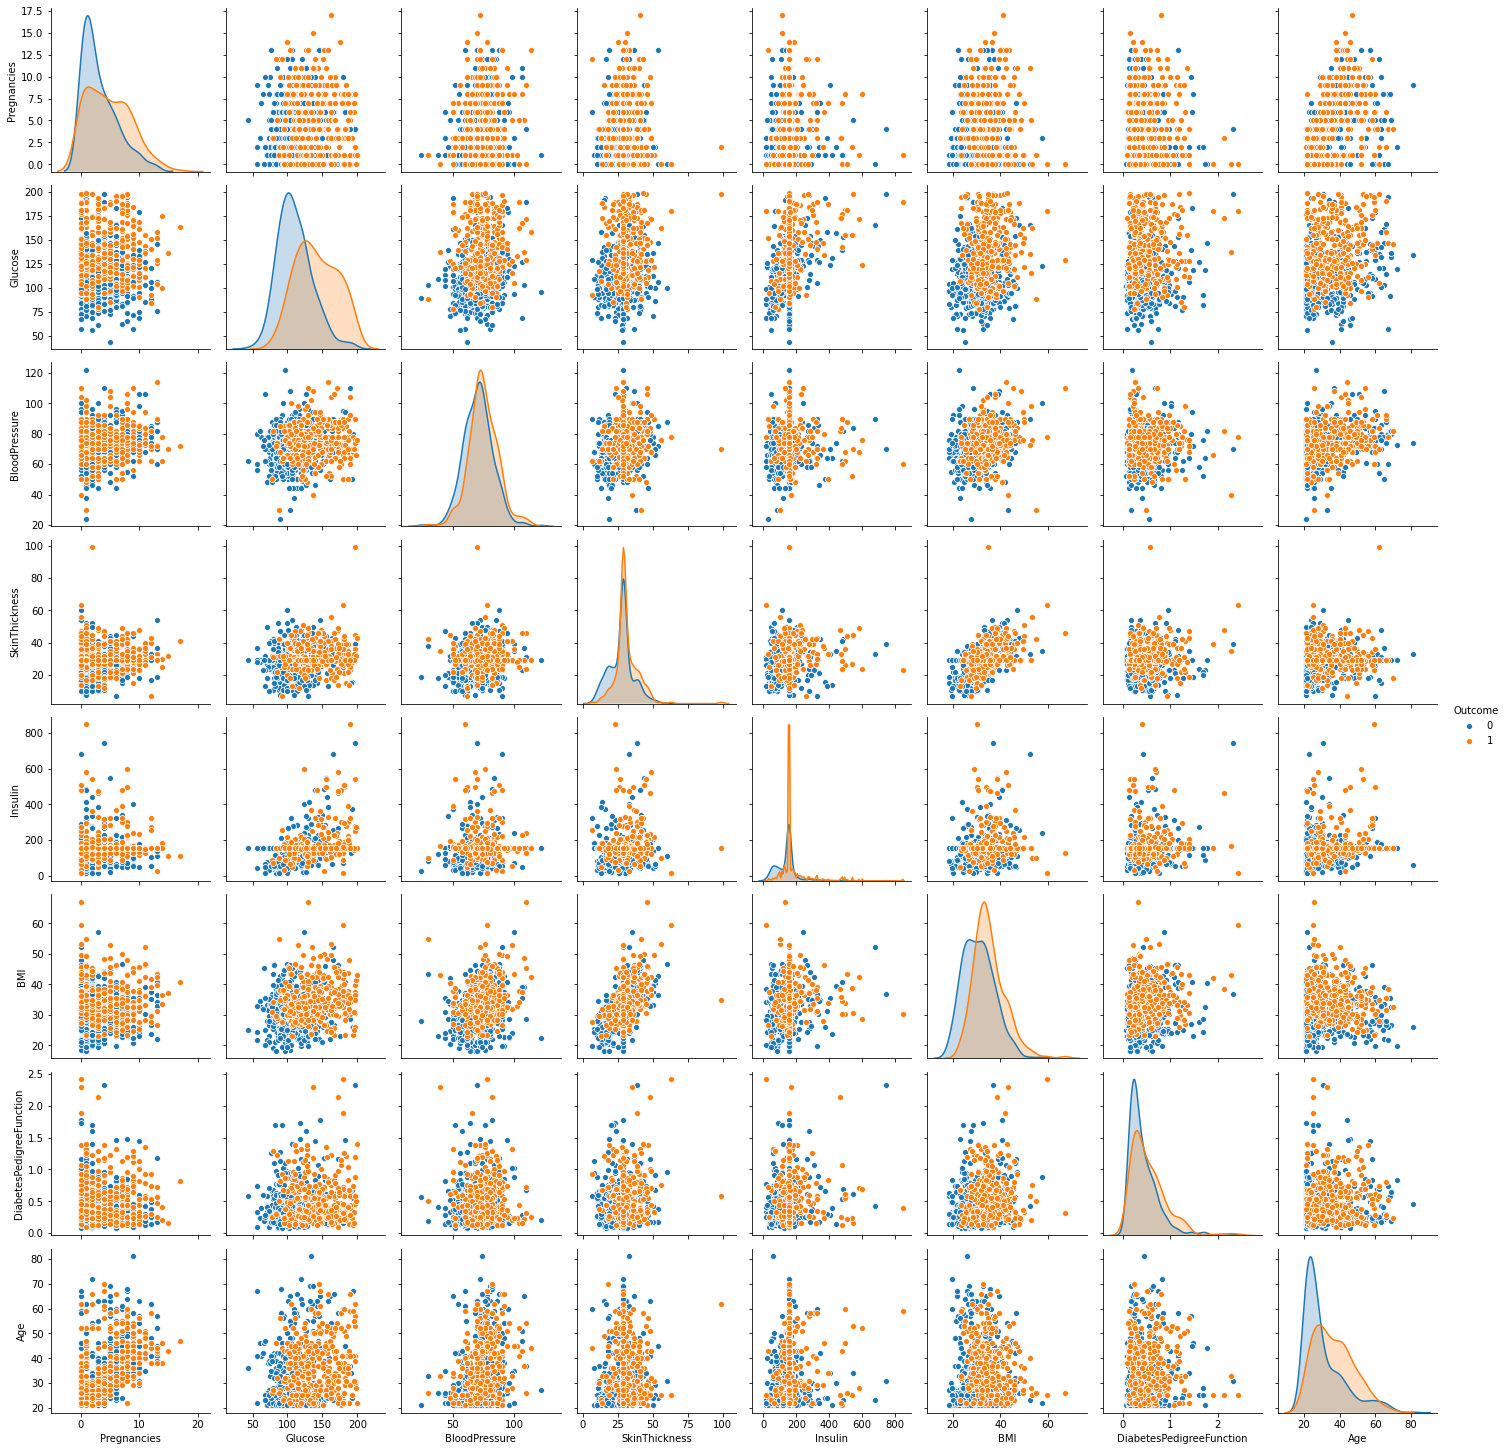

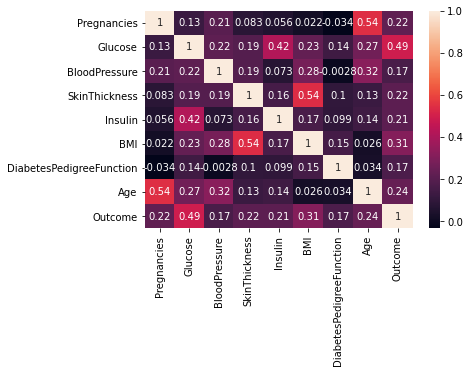

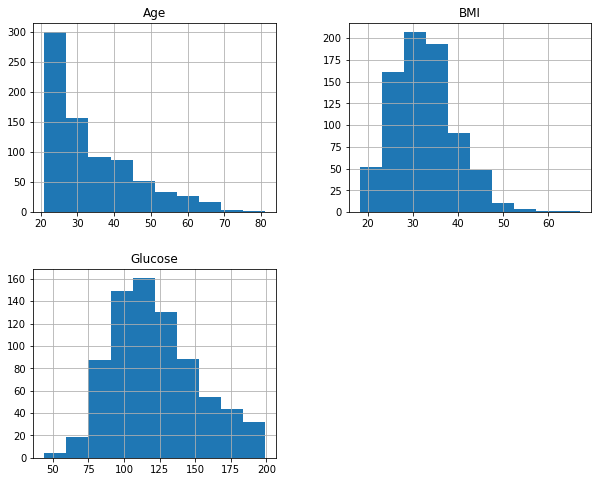

In [8]:
# Pairplot
sns.pairplot(data, hue='Outcome')
plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()

# Distribution of age, glucose, and BMI
data[['Age', 'Glucose', 'BMI']].hist(figsize=(10, 8))
plt.show()


In [9]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[82 17]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



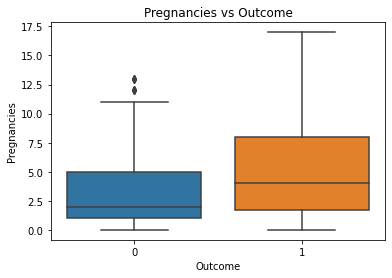

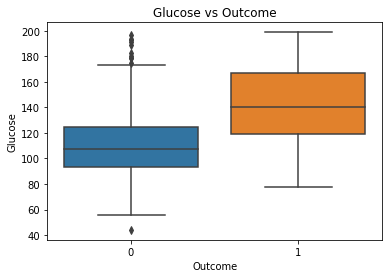

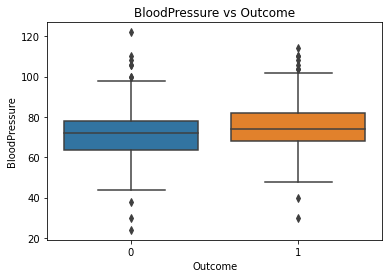

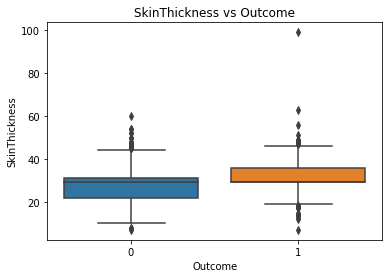

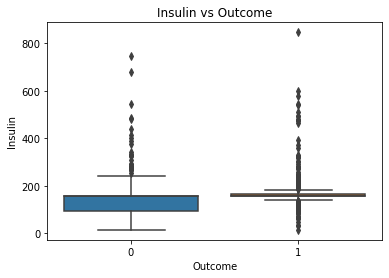

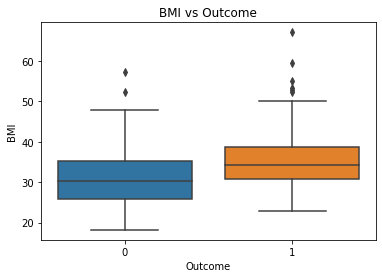

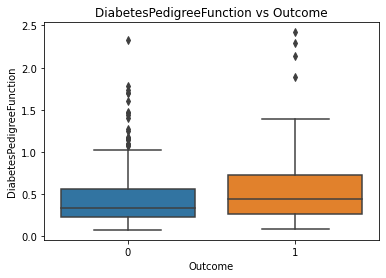

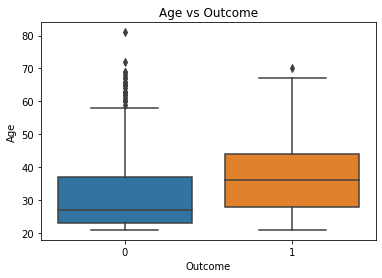

In [10]:
for column in data.columns[:-1]:
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f'{column} vs Outcome')
    plt.show()


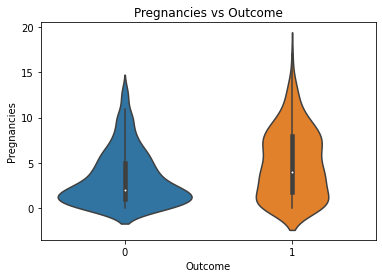

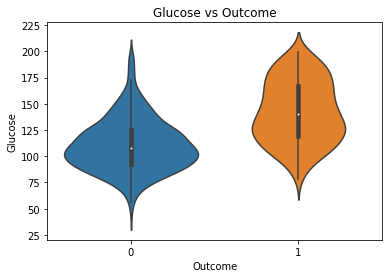

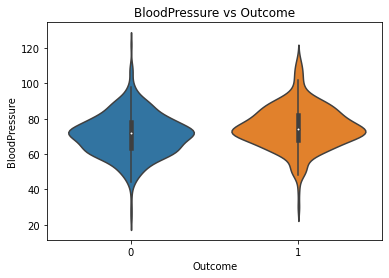

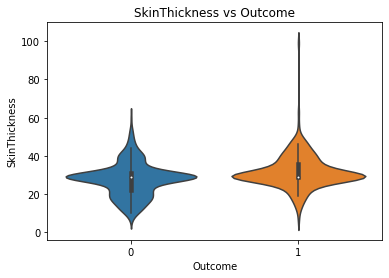

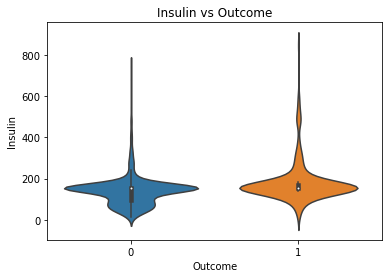

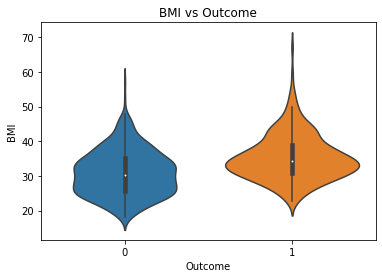

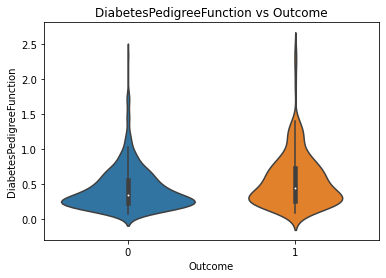

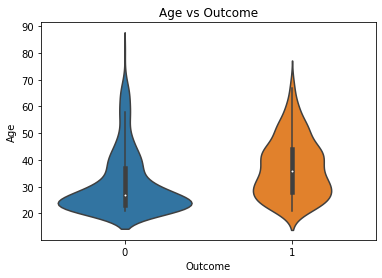

In [11]:
for column in data.columns[:-1]:
    sns.violinplot(x='Outcome', y=column, data=data)
    plt.title(f'{column} vs Outcome')
    plt.show()


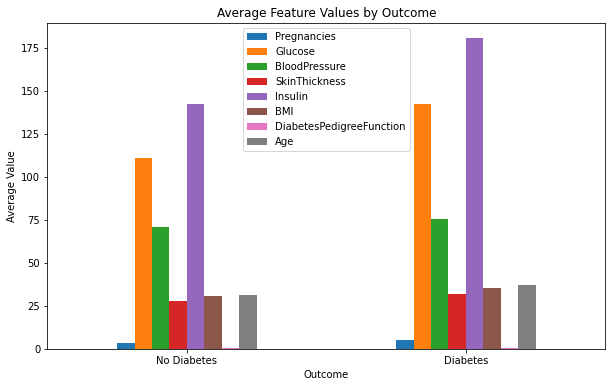

In [12]:
data.groupby('Outcome').mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Feature Values by Outcome')
plt.ylabel('Average Value')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()


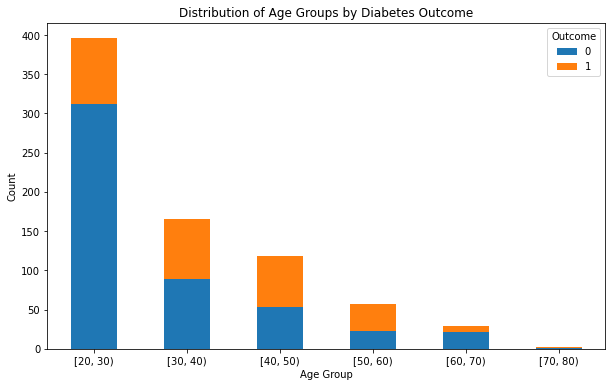

In [13]:
age_bins = [20, 30, 40, 50, 60, 70, 80]
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, right=False)

age_group_outcome = data.groupby(['AgeGroup', 'Outcome']).size().unstack()
age_group_outcome.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Age Groups by Diabetes Outcome')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

data.drop('AgeGroup', axis=1, inplace=True)
